# Introduction
This note book provides the demostration of geospatial data handling shown during the labs for reference.

## Import the gdal

In [166]:
from osgeo import gdal

## Explore the inputdata file

In [167]:
inputfile="1.tif"
inputfile="F:\\IIRSOUTREACHPROGRAMME-2022-AIEO-main\\data\\1.tif"
dataset=gdal.Open(inputfile)

In [252]:
dataset.GetDriver().ShortName


'GTiff'

In [253]:
dataset.GetDriver().ShortName #Provides the Driver name
dataset.RasterXSize,dataset.RasterYSize #Provides the pixels and lines in image
noOfbands=dataset.RasterCount #Total number of bands presents in the input image
dataset.GetProjection() #Get the project details
trans=dataset.GetGeoTransform() #Get the cordinate referene and X and Y pixel size
band=dataset.GetRasterBand(1) # Read the first band
data=band.ReadAsArray() #Provides the data in numpy format
dataset.GetRasterBand(1).GetNoDataValue() #The values used for represting the NA value

In [254]:
import osgeo
from osgeo import gdal

inputfile="data/LC08_L1TP_146039_20211229_20220106_01_T1/1.tif"
#inputfile="F:\IIRSOUTREACHPROGRAMME-2022-AIEO-main\data\1.tif"
dataset=gdal.Open(inputfile)


if dataset is None:
    print('Unable to open the file.')
else:
    print('Driver:', dataset.GetDriver().ShortName)
    print('Size:', dataset.RasterXSize, dataset.RasterYSize)
    print('Number of bands:', dataset.RasterCount)
    print('Projection:', dataset.GetProjection())
    print('GeoTransform:', dataset.GetGeoTransform())
    print('NoDataValue:', dataset.GetRasterBand(1).GetNoDataValue())
    print('data:',dataset.ReadAsArray())

Driver: GTiff
Size: 3601 3601
Number of bands: 1
Projection: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
GeoTransform: (75.999861111, 0.0002777777778394883, 0.0, 35.000138889, 0.0, -0.0002777777778394883)
NoDataValue: -32767.0
data: [[4283 4274 4269 ... 5288 5290 5294]
 [4286 4278 4271 ... 5292 5296 5302]
 [4291 4283 4275 ... 5299 5303 5309]
 ...
 [5394 5399 5405 ... 4520 4548 4560]
 [5394 5400 5406 ... 4517 4527 4541]
 [5392 5400 5406 ... 4508 4517 4523]]


In [255]:


import numpy as np

# Assuming 'data' is your 2D array
#data = np.random.rand(10, 10)

# Define the 'trans' variable
#trans = data.transpose(1, 0)

# Now you can use the 'trans' variable in your print statement
print(trans) 
print(data.shape)

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(3601, 3601)


## Compute the extent of image

In [256]:
(minx,minxx,miny,minyy)=(trans[0],trans[0]+trans[1]*data.shape[1],trans[3]+trans[5]*data.shape[0],trans[3])

In [257]:
print(minx,minxx,miny,minyy)

0.0 3601.0 3601.0 0.0


## Plot the image

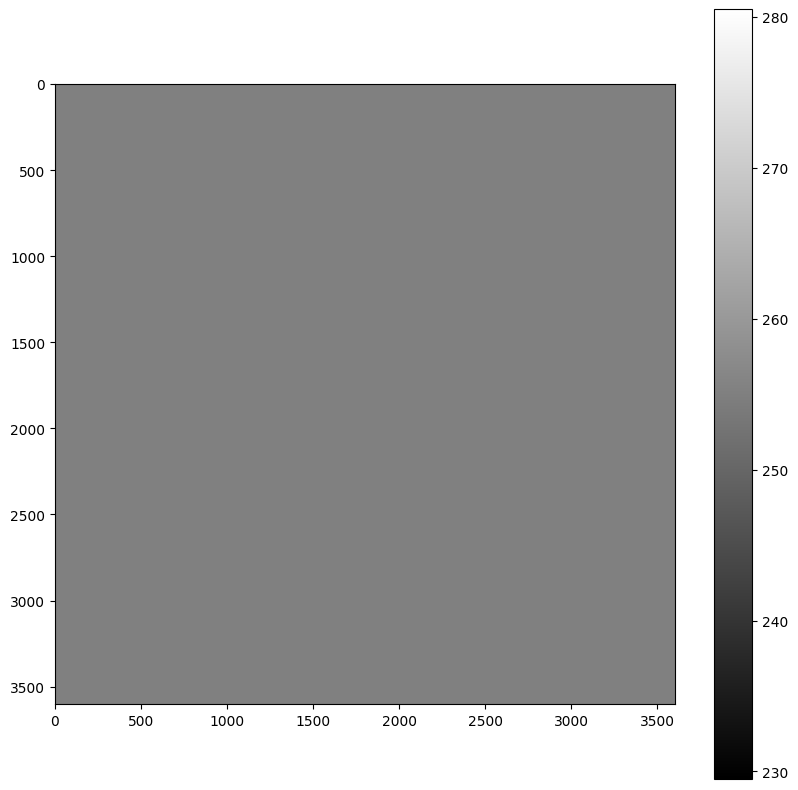

In [258]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(data,extent=(minx,minxx,miny,minyy),cmap='gray')
plt.colorbar()

## Plot the indivdual bands

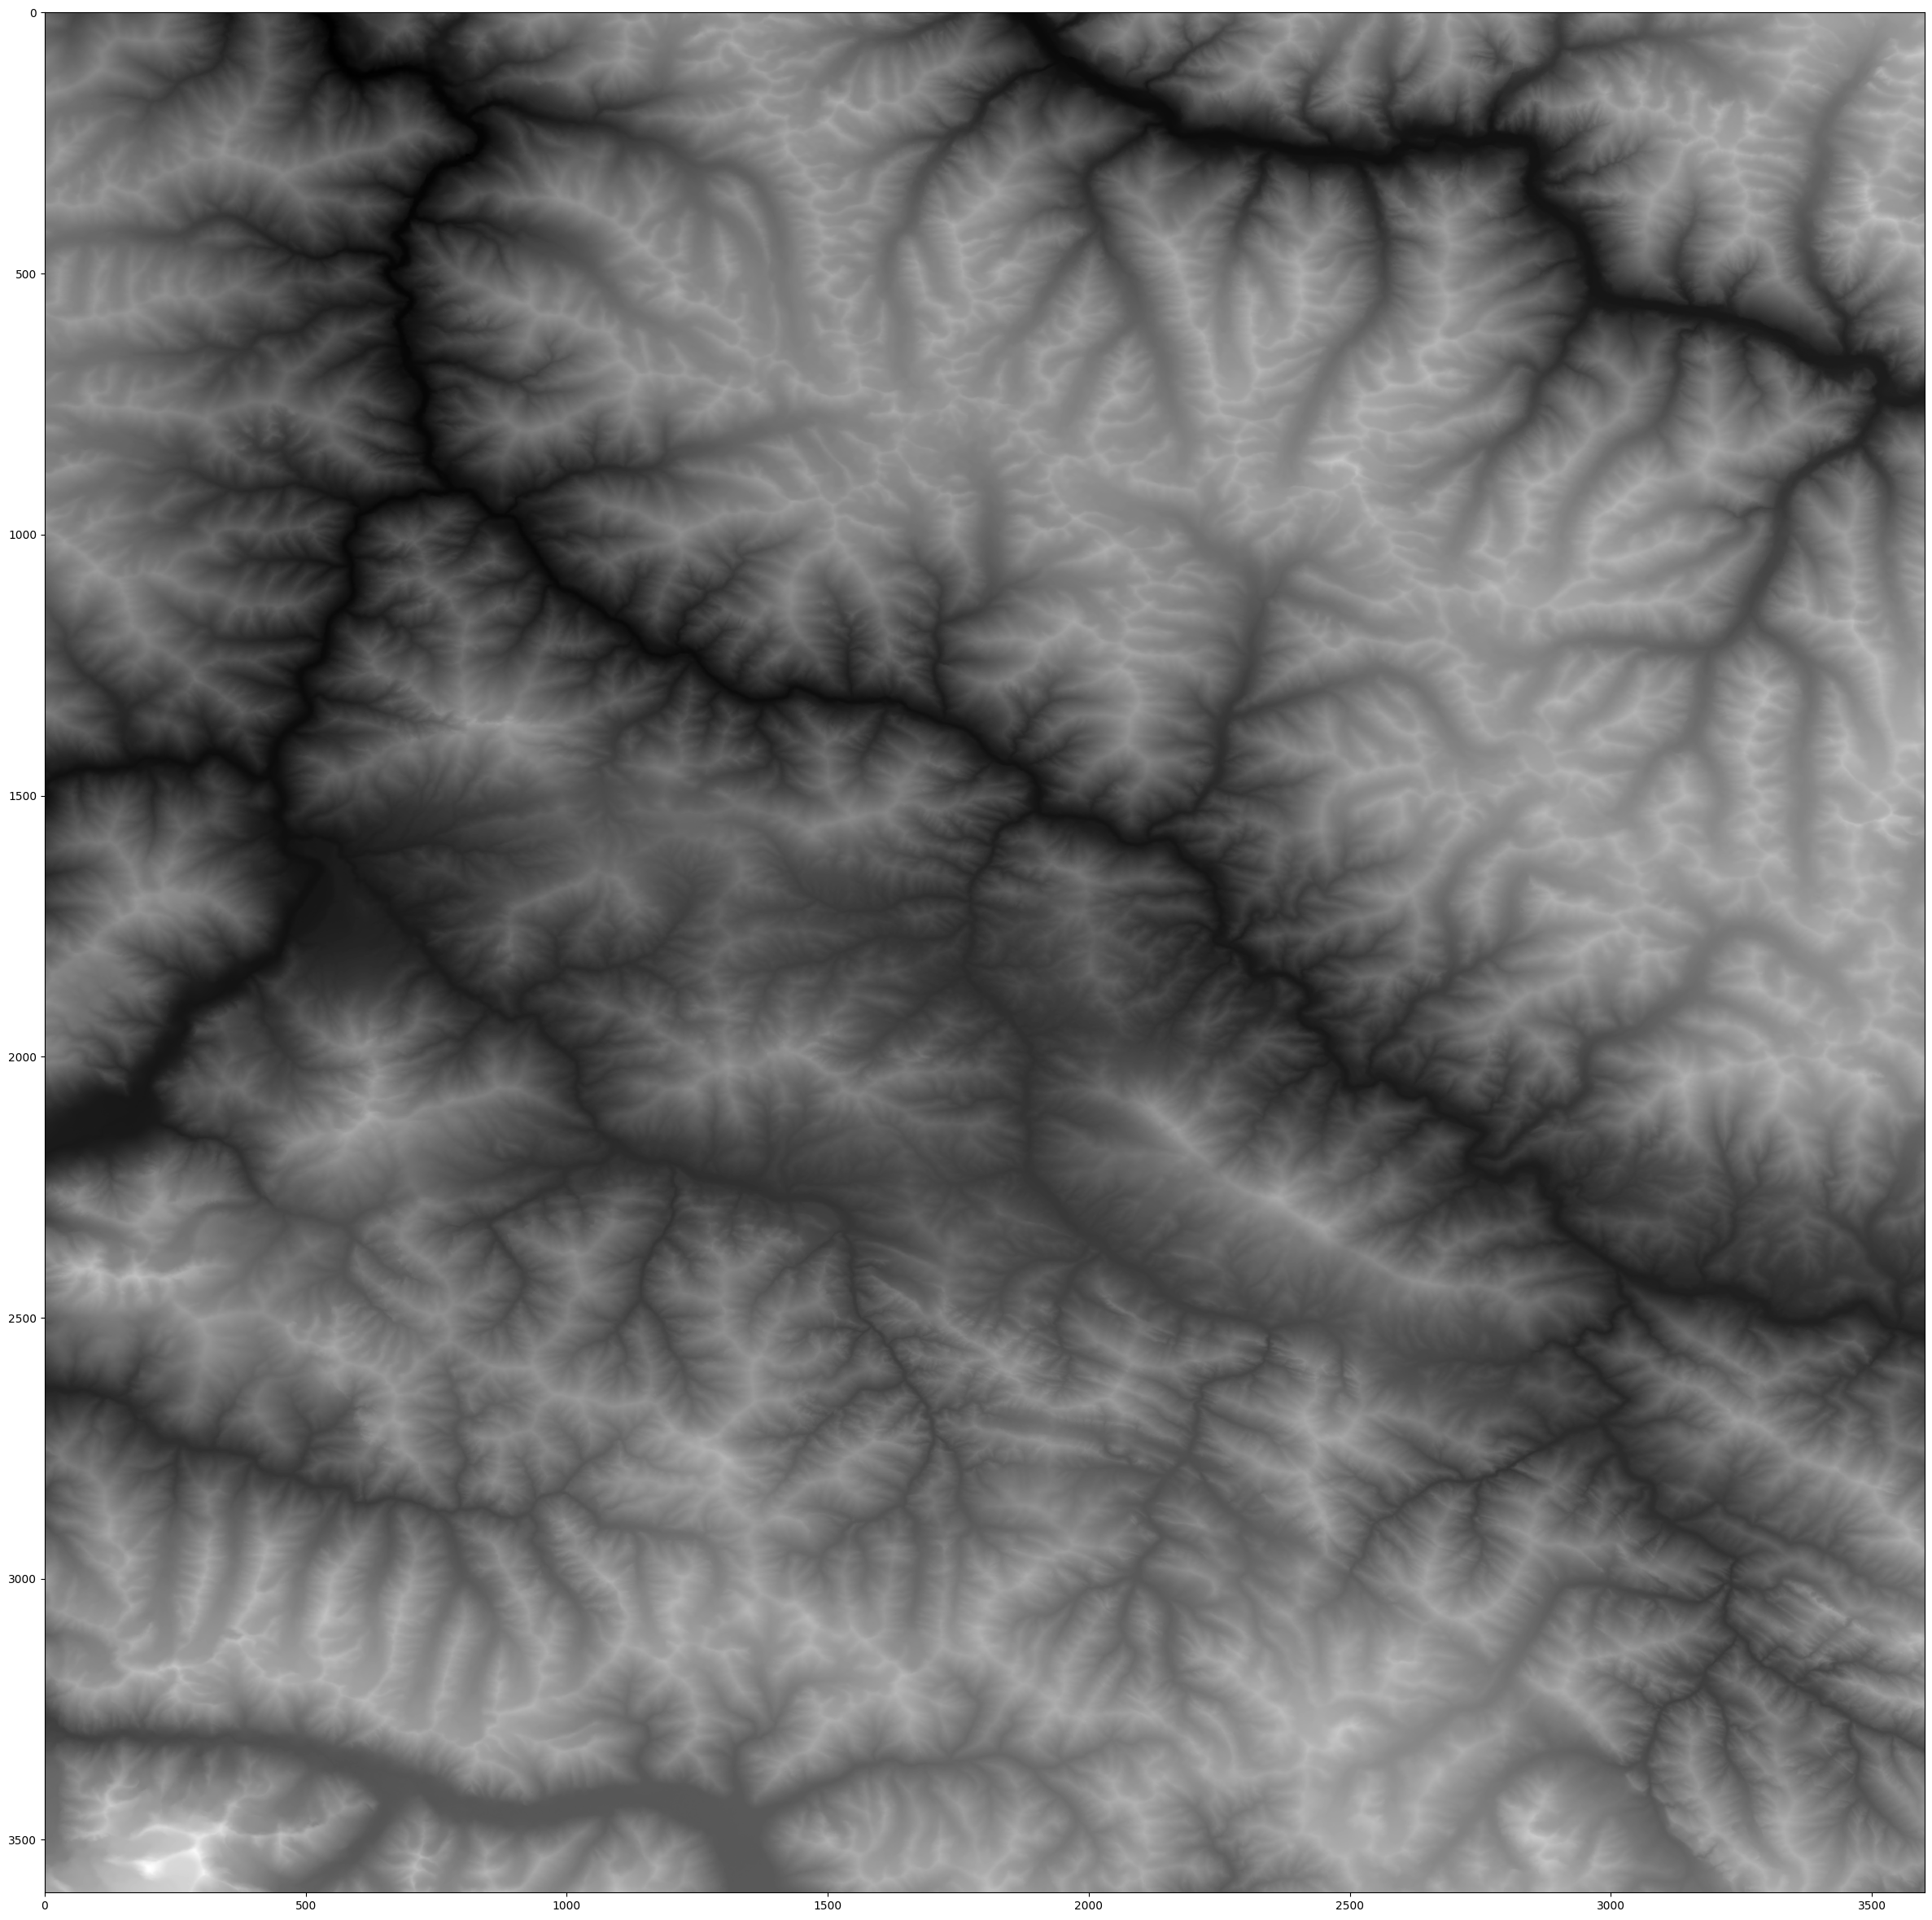

In [259]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
for i in range(1,noOfbands+1):
    band=dataset.GetRasterBand(i)
    data=band.ReadAsArray()
    plt.subplot(1,noOfbands,i)
    plt.imshow(data,cmap='gray',extent=(minx,minxx,miny,minyy))
dataset = None

In [260]:
data.shape

(3601, 3601)

# Creating a output file

In [261]:
fileFormat='GTiff'
noOfBands=1
driver=gdal.GetDriverByName(fileFormat)
dst_filename='Lecture2Out.tif'
data=data+20
yrow,xcol=data.shape
outDS=driver.Create(dst_filename,xsize=data.shape[1],ysize=data.shape[0],bands=noOfBands,eType=gdal.GDT_Byte)

## Setting the georeference system to output file

In [ ]:

#dataset.GetProjection()
#srs=osr.SpatialReference()
#srs.setUTM(44,1)
#srs.setWellKnownGeoCS('WGS84')

In [28]:
from osgeo import gdal
from osgeo import osr

# Open a raster dataset
inputfile="data/LC08_L1TP_146039_20211229_20220106_01_T1/1.tif"
#inputfile="F:\\IIRSOUTREACHPROGRAMME-2022-AIEO-main\\data\\LC08_L1TP_146039_20211229_20220106_01_T1\\LC08_L1TP_146039_20211229_20220106_01_T1_stack.tif"
dataset=gdal.Open(inputfile)

# Assuming 'dataset' is a gdal Dataset
dataset.GetProjection()
srs = osr.SpatialReference()
srs.SetUTM(44, 1)
srs.SetWellKnownGeogCS('WGS84')

0

In [29]:

outDS.SetGeoTransform(dataset.GetGeoTransform)  #Setting the cordinate reference 
outDS.SetProjection(srs.ExportToWkt()) #Seting the paramter for the projection which we need. Here it is WGS84,UTM


AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'

In [30]:
from osgeo import gdal
from osgeo import osr

# Open the input raster dataset
inputfile ='data/LC08_L1TP_146039_20211229_20220106_01_T1/1.tif'
ds = gdal.Open(inputfile)

# Get the coordinate reference system of the input raster dataset
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)  # Example: WGS84

# Create the output raster dataset
outputfile = 'data/LC08_L1TP_146039_20211229_20220106_01_T1/1.tif'
outDS = gdal.Warp(outputfile, ds, dstSRS=srs)

# Set the coordinate reference system for the output raster dataset
outDS.SetGeoTransform(ds.GetGeoTransform())
outDS.SetProjection(srs.ExportToWkt())

# Clean up
ds = None
outDS = None

AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'

In [ ]:
out_band=outDS.GetRasterBand(1) #Creating the bands which will be written by the data
out_band.WriteArray(data) #Write the data into the raster band

outDS = None

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

# Reading the ESRI shape file

In [ ]:


#location=gdp.read_file('locs.shp')
#type(location)
#location.head(locations)
#location.crs

In [66]:

from shapely.geometry import Point
import fiona
import geopandas as gdp
with fiona.open('data\ClassPoints\rPoints\rPoints.shp') as src:
    # Get the CRS of the shapefile.
    crs = src.crs

    # Get the location of the point.
    point = Point(longitude, latitude)

    # Check if the point is within the shapefile.
    if point.within(src.bounds):
        # Get the features that intersect the point.
        features = [feature for feature in src if feature['geometry'].intersects(point)]

        # Print the features.
        print(features)


AttributeError: partially initialized module 'fiona' has no attribute '_loading' (most likely due to a circular import)

In [70]:
import fiona
with fiona.open('data\ClassPoints\rPoints\rPoints.shp', 'r') as inp:
     output_schema = inp.schema.copy()
     output_schema['geometry'] = 'Point'
     with collection("points.shp", "w",
               crs=inp.crs,
            driver="ESRI Shapefile",
               schema=output_schema
               ) as out:
         for f in inp.filter(
                   bbox=(-5.0, 55.0, 0.0, 60.0)
                   ):
               value = f['geometry']['coordinates'][0][0]
               f['geometry'] = {
                   'type': 'Point', 'coordinates': value}
               out.write(f)

AttributeError: partially initialized module 'fiona' has no attribute '_loading' (most likely due to a circular import)

TypeError: cannot unpack non-iterable Axes object

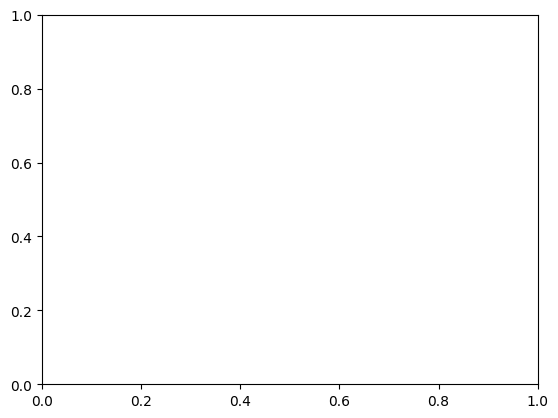

In [ ]:
import matplotlib.pyplot as plt
fix,ax1=plt.subplot()
fix,ax1=plt.subplot(figsize=(10,8))
location.plot(ax1)

In [ ]:
import matplotlib.pyplot as plt
location = gdp.read_file('data\ClassPoints\rPoints.shp')
type(location)
location.plot()
plt.imshow(data,extent=(minx,minxx,miny,minyy),cmap='gray')

AttributeError: partially initialized module 'fiona' has no attribute '_loading' (most likely due to a circular import)

In [ ]:
location.to_file("newshapeFile.shp")



NameError: name 'location' is not defined